In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
import pickle as pk
from sklearn import linear_model
import time
from skl_groups.features import Features
from skl_groups.summaries import BagOfWords
from sklearn.cluster import KMeans
from sklearn.cross_validation import KFold
from mpl_toolkits.axes_grid1 import *
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns
import scipy
from skl_groups.kernels import PairwisePicker, Symmetrize, RBFize, ProjectPSD
import matplotlib.lines as mlines

%matplotlib inline

In [3]:
numPCA_comp = 60
colNameList = []
for numDim in range(2,numPCA_comp,4):
    colNameList.append(['LLE_modified_f%d'%i for i in range(numDim)])

In [4]:
# read in the previously saved data
resultsRoot = '.'
# with open(resultsRoot + "/linReg_score_r2DictList.p", "rb") as f:
with open(resultsRoot + "/linReg_score_r2DictList_v2.p", "rb") as f:
    scoresDict = pk.load(f)
f.close()

In [5]:
# This is the function that is not working.
def confidenceInterval(colNameList, scores):
    """
    Compute the confidence interval of the data
    Source: http://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot
    
    Inputs:
    - x: xAxis data
    - y: y axis data
    
    Returns
    - CI: confidence interval
    """
    import scikits.bootstrap as boot
    upperlimits  = np.zeros(len(colNameList),)
    lowerlimits = np.zeros(len(colNameList),)
    r2Mean = np.zeros(len(colNameList),)
    halfDelta = np.zeros(len(colNameList),)
    for i in range(len(colNameList)):
        l,u = boot.ci( np.array(scores), np.mean)
        upperlimits[i] = u
        lowerlimits[i] = l
        r2Mean[i] = (u+l)/2.0
        halfDelta = (u-l)/2.0
    return np.array(range(2,numPCA_comp,10)), r2Mean, halfDelta

In [6]:
# read in the previously saved data
scoresList = scoresDict['histFHOG_largeRange_setting1']
# psList = psDict['histFHOG_largeRange_setting1']
# len = 21
# keys = SimulatedNNFeats, BOW (50 each for the 50 folds)

# compute average of the 50 folds for score and p value - y values
# rAvgUs = np.array([np.mean(scoresList[i]['Ours-KL']) for i in xrange(len(scoresList))])
# rAvgBOW = np.array([np.mean(scoresList[i]['BOW']) for i in xrange(len(scoresList))])
# rAvgHE = np.array([np.mean(scoresList[i]['Ours-HE']) for i in xrange(len(scoresList))])

# compute the std var for the error bars
# rStdUs = np.array([np.std(scoresList[i]['Ours-KL']) for i in xrange(len(scoresList))])
# rStdBOW = np.array([np.std(scoresList[i]['BOW']) for i in xrange(len(scoresList))])
# rStdHE = np.array([np.std(scoresList[i]['Ours-HE']) for i in xrange(len(scoresList))])
xAxis = np.array([len(colNames) for colNames in colNameList])

# trying stuff with confidence interval
shortScoresBOW = [scoresList[i]["BOW"] for i in xrange(9)]
shortScoresUs = [scoresList[i]["Ours-KL"] for i in xrange(9)]
shortScoresHE = [scoresList[i]["Ours-HE"] for i in xrange(9)]

ciXBOW, rAvgBOW, rStdBOW = confidenceInterval(colNameList[:9], shortScoresBOW)
ciXUs, rAvgUs, rStdUs = confidenceInterval(colNameList[:9], shortScoresUs)
ciXHE, rAvgHE, rStdHE = confidenceInterval(colNameList[:9], shortScoresHE)

#limit the R for HE
# rAvgHE[rAvgHE < 0] = 0.0

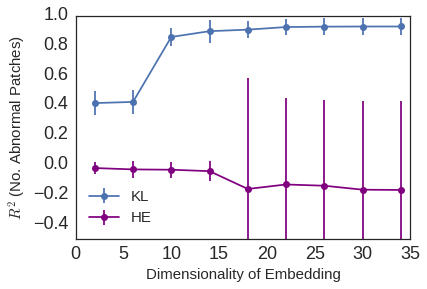

In [7]:
# plot the average scores
sns.set_style("white") # -- set background white
fig = plt.figure()
# plt.title("Cross Validation")
plt.ylabel(r'$R^2$ (No. Abnormal Patches)', fontsize=15)
plt.xlabel("Dimensionality of Embedding", fontsize=15)

# add the error bars
l1 = plt.errorbar(xAxis[:9], rAvgUs[:9], rStdUs[:9], fmt='-o', color=sns.color_palette()[0], label='KL')
l3 = plt.errorbar(xAxis[:9], rAvgHE[:9], rStdHE[:9], fmt='-o', color=sns.dark_palette("purple")[-1], label='HE')

# add a legend
plt.legend(handles=[l1, l3], loc=3, fontsize=15)
plt.ylim(-.5, 1.0)

# formatting the plot
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

# plot the average p values
plt.show()
fig.savefig("simulated-performance-kl-he-ci.pdf", bbox_inches='tight')

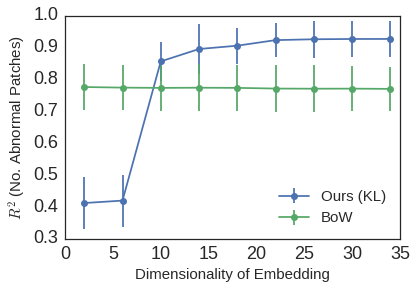

In [9]:
fig = plt.figure()

# scores and error bars
l1 = plt.errorbar(xAxis[:9], rAvgUs[:9], rStdUs[:9], fmt='-o', color=sns.color_palette()[0], label='Ours (KL)')
l2 = plt.errorbar(xAxis[:9], rAvgBOW[:9], rStdBOW[:9], fmt='-o', color=sns.color_palette()[1], label='BoW')
plt.ylabel(r'$R^2$ (No. Abnormal Patches)', fontsize=15)
plt.xlabel("Dimensionality of Embedding", fontsize=15)

# legend
plt.legend(handles=[l1, l2], loc=4, fontsize=15)

# formatting the plot
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
    
plt.show()
fig.savefig("simulated-performance-kl-bow-ci.pdf", bbox_inches='tight')